# Instructions to run the notebook: 
1. Run the first cell which includes files.upload()
2. Click choose files and select the files from your local machine 
3. Make sure the file names are exactly the same as downloaded from kaggle.

fashion-mnist_test.csv
fashion-mnist_train.csv

# Part 1: Data analysis and splitting



In [3]:
# load local csv
from google.colab import files
uploaded = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test.csv
Saving fashion-mnist_train.csv to fashion-mnist_train.csv


In [4]:
# import packages
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import SGD

In [5]:
# read in the dataset
test_df = pd.read_csv(io.BytesIO(uploaded["fashion-mnist_test.csv"]))
train_df = pd.read_csv(io.BytesIO(uploaded["fashion-mnist_train.csv"]))

In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


The header output above, shows that the results are in the first column, so we would need to extract that out and create a split.

The inputs range from 0-255, to preprocess this we will scale the values from 0 to 1 by dividing it by 255

In [7]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

In [8]:
# training test split
x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test= test_data[:,1:]/255
y_test=test_data[:,0]

In [9]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 648)

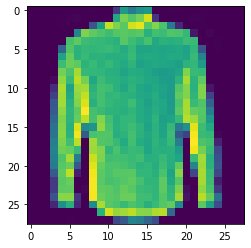

In [10]:
# plot a random item to see the output
plt.imshow(x_train[34].reshape((28,28)))
plt.show()

# Part 2: Model creation and training with Sigmoid activation function

In [11]:
image_rows = 28
image_cols = 28
image_shape = (image_rows,image_cols,1) 

BATCH_SIZE = 1000
EPOCHS = 10

In [12]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [13]:
# model
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3, activation='sigmoid',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Flatten(), 
    Dense(32,activation='sigmoid'),
    Dense(10,activation = 'sigmoid')
    
])

In [14]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.2),metrics =['accuracy'])

In [15]:
# train dataset
cnn_model_train = cnn_model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/10
48/48 [==============================] - 17s 345ms/step - loss: 2.2983 - accuracy: 0.1195 - val_loss: 2.3127 - val_accuracy: 0.1007
Epoch 2/10
48/48 [==============================] - 16s 340ms/step - loss: 2.2387 - accuracy: 0.1718 - val_loss: 2.1268 - val_accuracy: 0.2800
Epoch 3/10
48/48 [==============================] - 16s 332ms/step - loss: 2.0114 - accuracy: 0.2649 - val_loss: 1.8161 - val_accuracy: 0.2838
Epoch 4/10
48/48 [==============================] - 16s 327ms/step - loss: 1.5525 - accuracy: 0.4411 - val_loss: 1.2921 - val_accuracy: 0.5562
Epoch 5/10
48/48 [==============================] - 16s 326ms/step - loss: 1.1726 - accuracy: 0.5942 - val_loss: 1.0722 - val_accuracy: 0.6424
Epoch 6/10
48/48 [==============================] - 15s 323ms/step - loss: 0.9995 - accuracy: 0.6452 - val_loss: 0.9276 - val_accuracy: 0.6689
Epoch 7/10
48/48 [==============================] - 15s 322ms/step - loss: 0.9073 - accuracy: 0.6740 - val_loss: 0.8444 - val_accuracy: 0.7188

In [16]:
# test dataset
cnn_model_test = cnn_model.fit(
    x_test,
    y_test,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/10
10/10 [==============================] - 4s 434ms/step - loss: 0.7513 - accuracy: 0.7136 - val_loss: 0.7899 - val_accuracy: 0.7119
Epoch 2/10
10/10 [==============================] - 4s 427ms/step - loss: 0.7410 - accuracy: 0.7237 - val_loss: 0.7184 - val_accuracy: 0.7335
Epoch 3/10
10/10 [==============================] - 4s 431ms/step - loss: 0.7182 - accuracy: 0.7350 - val_loss: 0.6926 - val_accuracy: 0.7427
Epoch 4/10
10/10 [==============================] - 4s 431ms/step - loss: 0.7032 - accuracy: 0.7423 - val_loss: 0.7191 - val_accuracy: 0.7278
Epoch 5/10
10/10 [==============================] - 4s 425ms/step - loss: 0.7136 - accuracy: 0.7381 - val_loss: 0.7512 - val_accuracy: 0.7125
Epoch 6/10
10/10 [==============================] - 4s 425ms/step - loss: 0.7238 - accuracy: 0.7278 - val_loss: 0.6980 - val_accuracy: 0.7437
Epoch 7/10
10/10 [==============================] - 4s 425ms/step - loss: 0.7071 - accuracy: 0.7344 - val_loss: 0.7064 - val_accuracy: 0.7132
Epoch 

# Part 3: Model training with RELU activation function

In [57]:
# relu
relu_cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3, activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Flatten(), 
    Dense(32,activation='relu'),
    Dense(10,activation = 'relu')
    
])

In [58]:
relu_cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.2),metrics =['accuracy'])

In [59]:
relu_model_train = relu_cnn_model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/10
48/48 [==============================] - 16s 325ms/step - loss: 11.0190 - accuracy: 0.1002 - val_loss: 11.0491 - val_accuracy: 0.1007
Epoch 2/10
48/48 [==============================] - 16s 325ms/step - loss: 11.0592 - accuracy: 0.0998 - val_loss: 11.0491 - val_accuracy: 0.1007
Epoch 3/10
48/48 [==============================] - 15s 320ms/step - loss: 11.0592 - accuracy: 0.0998 - val_loss: 11.0491 - val_accuracy: 0.1007
Epoch 4/10
48/48 [==============================] - 15s 320ms/step - loss: 11.0592 - accuracy: 0.0998 - val_loss: 11.0491 - val_accuracy: 0.1007
Epoch 5/10
48/48 [==============================] - 15s 323ms/step - loss: 11.0592 - accuracy: 0.0998 - val_loss: 11.0491 - val_accuracy: 0.1007
Epoch 6/10
48/48 [==============================] - 15s 322ms/step - loss: 11.0592 - accuracy: 0.0998 - val_loss: 11.0491 - val_accuracy: 0.1007
Epoch 7/10
48/48 [==============================] - 15s 323ms/step - loss: 11.0592 - accuracy: 0.0998 - val_loss: 11.0491 - val_ac

In [60]:
relu_model_test = relu_cnn_model.fit(
    x_test,
    y_test,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/10
10/10 [==============================] - 4s 429ms/step - loss: 11.0572 - accuracy: 0.1000 - val_loss: 11.0491 - val_accuracy: 0.1007
Epoch 2/10
10/10 [==============================] - 4s 429ms/step - loss: 11.0572 - accuracy: 0.1000 - val_loss: 11.0491 - val_accuracy: 0.1007
Epoch 3/10
10/10 [==============================] - 4s 421ms/step - loss: 11.0572 - accuracy: 0.1000 - val_loss: 11.0491 - val_accuracy: 0.1007
Epoch 4/10
10/10 [==============================] - 4s 423ms/step - loss: 11.0572 - accuracy: 0.1000 - val_loss: 11.0491 - val_accuracy: 0.1007
Epoch 5/10
10/10 [==============================] - 4s 427ms/step - loss: 11.0572 - accuracy: 0.1000 - val_loss: 11.0491 - val_accuracy: 0.1007
Epoch 6/10
10/10 [==============================] - 4s 423ms/step - loss: 11.0572 - accuracy: 0.1000 - val_loss: 11.0491 - val_accuracy: 0.1007
Epoch 7/10
10/10 [==============================] - 4s 420ms/step - loss: 11.0572 - accuracy: 0.1000 - val_loss: 11.0491 - val_accuracy:

## Dropout regularisation with RELU activation function


In [75]:
# dropout
dropout_cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3, activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    Flatten(), 
    Dense(32,activation='relu'),
    Dense(10,activation = 'relu')
    
])

In [76]:
dropout_cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.2),metrics =['accuracy'])

In [77]:
dropout_model_train = dropout_cnn_model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/10
48/48 [==============================] - 19s 388ms/step - loss: 5.3045 - accuracy: 0.1016 - val_loss: 5.2090 - val_accuracy: 0.0983
Epoch 2/10
48/48 [==============================] - 18s 385ms/step - loss: 5.3266 - accuracy: 0.1004 - val_loss: 5.2090 - val_accuracy: 0.0983
Epoch 3/10
48/48 [==============================] - 18s 383ms/step - loss: 5.3266 - accuracy: 0.1004 - val_loss: 5.2090 - val_accuracy: 0.0983
Epoch 4/10
48/48 [==============================] - 18s 383ms/step - loss: 5.0664 - accuracy: 0.0993 - val_loss: 3.8010 - val_accuracy: 0.0947
Epoch 5/10
48/48 [==============================] - 19s 392ms/step - loss: 3.8110 - accuracy: 0.1013 - val_loss: 3.8010 - val_accuracy: 0.0947
Epoch 6/10
48/48 [==============================] - 18s 372ms/step - loss: 4.3510 - accuracy: 0.1013 - val_loss: 5.3057 - val_accuracy: 0.0947
Epoch 7/10
48/48 [==============================] - 18s 373ms/step - loss: 5.3024 - accuracy: 0.1013 - val_loss: 5.3057 - val_accuracy: 0.0947

In [78]:
dropout_model_test = dropout_cnn_model.fit(
    x_test,
    y_test,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/10
10/10 [==============================] - 5s 481ms/step - loss: 6.7813 - accuracy: 0.1000 - val_loss: 6.7975 - val_accuracy: 0.0947
Epoch 2/10
10/10 [==============================] - 5s 470ms/step - loss: 6.7813 - accuracy: 0.1000 - val_loss: 6.7975 - val_accuracy: 0.0947
Epoch 3/10
10/10 [==============================] - 5s 470ms/step - loss: 6.7813 - accuracy: 0.1000 - val_loss: 6.7975 - val_accuracy: 0.0947
Epoch 4/10
10/10 [==============================] - 5s 471ms/step - loss: 6.7813 - accuracy: 0.1000 - val_loss: 6.7975 - val_accuracy: 0.0947
Epoch 5/10
10/10 [==============================] - 5s 470ms/step - loss: 6.7813 - accuracy: 0.1000 - val_loss: 6.7975 - val_accuracy: 0.0947
Epoch 6/10
10/10 [==============================] - 5s 466ms/step - loss: 6.7813 - accuracy: 0.1000 - val_loss: 6.7975 - val_accuracy: 0.0947
Epoch 7/10
10/10 [==============================] - 5s 471ms/step - loss: 6.7813 - accuracy: 0.1000 - val_loss: 6.7975 - val_accuracy: 0.0947
Epoch 

## Part 4 (Proposed Extension): Model creation with RELU + SOFTMAX 

In [25]:
# relu + softmax
relu_softmax_cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3, activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    Flatten(), 
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

In [26]:
relu_softmax_cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.2),metrics =['accuracy'])

In [27]:
relu_softmax_model_train = relu_softmax_cnn_model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/10
48/48 [==============================] - 19s 388ms/step - loss: 1.5448 - accuracy: 0.4876 - val_loss: 1.0327 - val_accuracy: 0.5571
Epoch 2/10
48/48 [==============================] - 18s 379ms/step - loss: 0.7679 - accuracy: 0.7048 - val_loss: 0.6425 - val_accuracy: 0.7485
Epoch 3/10
48/48 [==============================] - 18s 380ms/step - loss: 0.6097 - accuracy: 0.7648 - val_loss: 0.5444 - val_accuracy: 0.7948
Epoch 4/10
48/48 [==============================] - 18s 379ms/step - loss: 0.5555 - accuracy: 0.7876 - val_loss: 0.5380 - val_accuracy: 0.7839
Epoch 5/10
48/48 [==============================] - 18s 378ms/step - loss: 0.5126 - accuracy: 0.8090 - val_loss: 0.4822 - val_accuracy: 0.8235
Epoch 6/10
48/48 [==============================] - 18s 377ms/step - loss: 0.4806 - accuracy: 0.8202 - val_loss: 0.4413 - val_accuracy: 0.8396
Epoch 7/10
48/48 [==============================] - 18s 379ms/step - loss: 0.4583 - accuracy: 0.8309 - val_loss: 0.4568 - val_accuracy: 0.8299

In [28]:
relu_softmax_model_test = relu_softmax_cnn_model.fit(
    x_test,
    y_test,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/10
10/10 [==============================] - 5s 481ms/step - loss: 0.3988 - accuracy: 0.8547 - val_loss: 0.3779 - val_accuracy: 0.8637
Epoch 2/10
10/10 [==============================] - 5s 476ms/step - loss: 0.3949 - accuracy: 0.8533 - val_loss: 0.3829 - val_accuracy: 0.8627
Epoch 3/10
10/10 [==============================] - 5s 474ms/step - loss: 0.3908 - accuracy: 0.8544 - val_loss: 0.3808 - val_accuracy: 0.8648
Epoch 4/10
10/10 [==============================] - 5s 473ms/step - loss: 0.3714 - accuracy: 0.8662 - val_loss: 0.3924 - val_accuracy: 0.8540
Epoch 5/10
10/10 [==============================] - 5s 479ms/step - loss: 0.3690 - accuracy: 0.8702 - val_loss: 0.3743 - val_accuracy: 0.8656
Epoch 6/10
10/10 [==============================] - 5s 482ms/step - loss: 0.3671 - accuracy: 0.8671 - val_loss: 0.4036 - val_accuracy: 0.8526
Epoch 7/10
10/10 [==============================] - 5s 482ms/step - loss: 0.3704 - accuracy: 0.8695 - val_loss: 0.3893 - val_accuracy: 0.8562
Epoch 

Text(0.5, 1.0, 'Test - Accuracy')

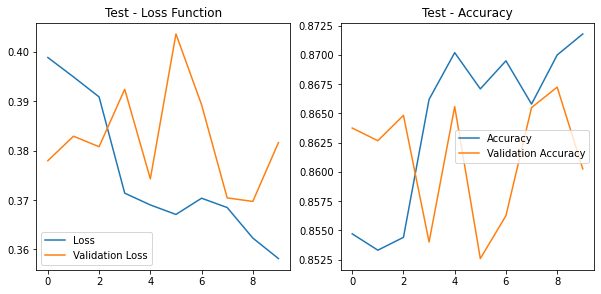

In [29]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(relu_softmax_model_test.history['loss'], label='Loss')
plt.plot(relu_softmax_model_test.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Test - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(relu_softmax_model_test.history['accuracy'], label='Accuracy')
plt.plot(relu_softmax_model_test.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Test - Accuracy')